# Triangulation and Trilateration Demos



*localization library currently borked on Mybinder - shapely needs to be installed*

In [2]:
%matplotlib inline
#Configure the notebooks to display plots inline and import some plotting tools
import matplotlib.pyplot as plt
import folium

/home/main/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/main/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
#Define the circular areas - first the origins
circle1=(3,2)
circle2=(2,0)
circle3=(1,2)
#Then the radii
r1=2
r2=1.5
r3=1.5

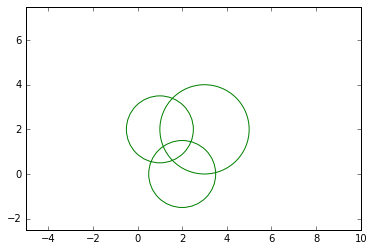

In [5]:
#Plot the circles
circle1_plot = plt.Circle(circle1, radius=r1,color='g',fill=None)
circle2_plot = plt.Circle(circle2, r2,color='g',fill=None)
circle3_plot = plt.Circle(circle3, r3,color='g',fill=None)

#We'll create each plot as a subplot and then combine them
fig, ax = plt.subplots() 

#Make sure the axes have a 1:1 aspect ratio, and set the axis limits (we could calculate these)
plt.axis('equal')
plt.xlim(-5,10)
plt.ylim(-5,10)

#add each plot to the same axis set
ax.add_artist(circle1_plot)
ax.add_artist(circle2_plot)
ax.add_artist(circle3_plot)

#Add a point to show the localised centroid
#Centroid found using localization function
#ax.scatter(t.loc.x,t.loc.y,color='r')

#Display the plot
plt.show()

In [ ]:
#Make use of a third party library that implements some localisation functions
#https://github.com/kamalshadi/Localization
import localization as lx

In [ ]:
#Define the localisation algorith to use - here we find the centroid of the intersection
P=lx.Project(mode='2D',solver='CCA')

In [ ]:
#Create objects using the locationlisation package with appropriate paramters
P.add_anchor('A',circle1)
P.add_anchor('B',circle2)
P.add_anchor('C',circle3)
t,label=P.add_target()
t.add_measure('A',r1)
t.add_measure('B',r2)
t.add_measure('C',r3)

In [ ]:
#Find the centroid of intersection of the circles
P.solve()
t.loc.x,t.loc.y